In [1]:
import torch
from torch import optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import nn as nn

In [2]:
training_data=datasets.FashionMNIST(
    root='data',
    download=True,
    train=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=ToTensor()
)

In [3]:
len(training_data)

60000

In [4]:
train_dataloader=DataLoader(training_data,shuffle=True,batch_size=64)
test_dataloader=DataLoader(test_data,shuffle=True,batch_size=64)

In [5]:
data=iter(train_dataloader)
images,label=next(data)

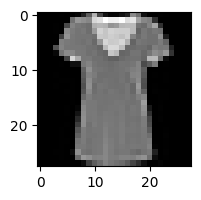

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()

In [7]:
label

tensor([0, 2, 6, 3, 7, 0, 0, 7, 5, 0, 4, 9, 5, 5, 8, 3, 5, 8, 2, 3, 3, 3, 8, 0,
        3, 7, 0, 3, 5, 8, 6, 8, 0, 6, 6, 7, 0, 5, 3, 8, 4, 9, 3, 2, 7, 9, 2, 2,
        9, 3, 5, 0, 2, 1, 7, 4, 1, 2, 9, 3, 5, 1, 5, 7])

In [8]:
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [9]:
model=classifier()
# optimizer=optim.SGD(model.parameters(),lr=0.002,momentum=0.9)
optimizer=optim.Adam(model.parameters(),lr=0.002)
criterion=nn.CrossEntropyLoss()

In [10]:
epochs=2
for epoch in range(epochs):
    for batch,(images,labels) in enumerate(train_dataloader):
        pred=model(images)
        loss=criterion(pred,labels)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    
        if batch % 100==0:
            print(f"Batch:{batch}\tLoss:{loss}")

Batch:0	Loss:2.313905954360962
Batch:100	Loss:0.5193210244178772
Batch:200	Loss:0.5699601769447327
Batch:300	Loss:0.7373968958854675
Batch:400	Loss:0.40470027923583984
Batch:500	Loss:0.39034608006477356
Batch:600	Loss:0.34605270624160767
Batch:700	Loss:0.5856644511222839
Batch:800	Loss:0.314558744430542
Batch:900	Loss:0.6010290384292603
Batch:0	Loss:0.45571368932724
Batch:100	Loss:0.4616625905036926
Batch:200	Loss:0.2592940628528595
Batch:300	Loss:0.3621113896369934
Batch:400	Loss:0.5186359286308289
Batch:500	Loss:0.2871846854686737
Batch:600	Loss:0.25634923577308655
Batch:700	Loss:0.3674042522907257
Batch:800	Loss:0.30470481514930725
Batch:900	Loss:0.2917863726615906


In [23]:
model.eval()
all_labels=[]
all_Predicted=[]
with torch.no_grad():
    for images , labels in test_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,axis=1)
        all_labels.extend(labels.numpy())
        all_Predicted.extend(predicted.numpy())

In [24]:
all_labels[:5]

[np.int64(2), np.int64(4), np.int64(8), np.int64(2), np.int64(6)]

In [25]:
all_Predicted[:5]

[np.int64(2), np.int64(4), np.int64(8), np.int64(2), np.int64(2)]

In [28]:
from sklearn.metrics import classification_report
report=classification_report(all_labels,all_Predicted)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.84      0.78      1000
           3       0.86      0.86      0.86      1000
           4       0.79      0.73      0.76      1000
           5       0.95      0.96      0.95      1000
           6       0.76      0.48      0.59      1000
           7       0.93      0.94      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

